# Probability-insighter
https://github.com/alvason/probability-insighter

### Binomial random distribution

In [1]:
'''
author: Alvason Zhenhua Li
date:   03/19/2015
'''
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import os

import alva_machinery_probability as alva

AlvaFontSize = 23
AlvaFigSize = (16, 6)
numberingFig = 0
# for saving figure
saving_dir_path = '/Users/al/Desktop/GitHub/probability-insighter/figure'
file_name = 'binomial-distribution'
###############
import datetime
previous_running_time = datetime.datetime.now()
print ('Previous running time is {:}').format(previous_running_time)

Previous running time is 2016-05-08 12:33:37.573467
Previous running time is 2016-05-08 12:33:37.573702


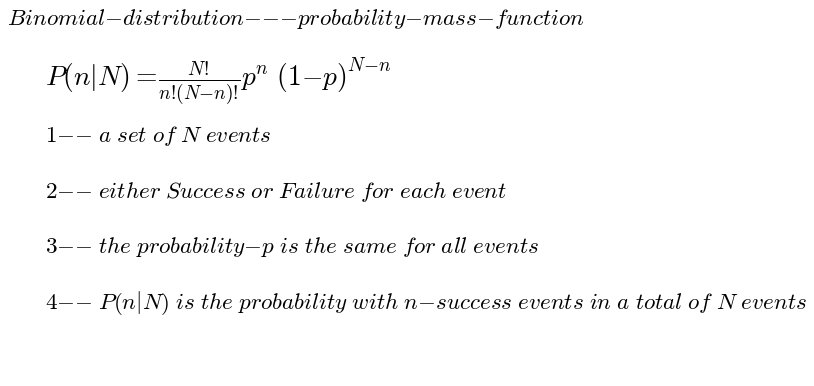

In [2]:
# plotting
figure_name = '-equation'
file_suffix = '.png'
save_figure = os.path.join(saving_dir_path, file_name + figure_name + file_suffix)

numberingFig = numberingFig + 1
plt.figure(numberingFig, figsize=(9, 6))
plt.axis('off')
plt.title(r'$ Binomial-distribution---probability-mass-function $',fontsize = AlvaFontSize)
plt.text(0, 5.0/6, r'$ P(n|N) = \frac{N!}{n!(N - n)!} p^n (1 - p)^{N - n} $', fontsize = 1.2*AlvaFontSize)
plt.text(0, 4.0/6, r'$ 1-- \ a \ set \ of \ N \ events $', fontsize = AlvaFontSize)
plt.text(0, 3.0/6, r'$ 2-- \ either \ Success \ or \ Failure \ for \ each \ event $', fontsize = AlvaFontSize)
plt.text(0, 2.0/6, r'$ 3-- \ the \ probability-p \ is \ the \ same \ for \ all \ events $', fontsize = AlvaFontSize)
plt.text(0, 1.0/6, r'$ 4-- \ P(n|N) \ is \ the \ probability \ with \ n-success \ events \ in \ a \ total \ of \ N \ events $',
         fontsize = AlvaFontSize)
plt.savefig(save_figure, dpi = 300)
plt.show()

('AlvaM =', array([  9.33262154e+157]))
('NumPy =', 9.3326215443944102e+157)
total-probability = 0.957609


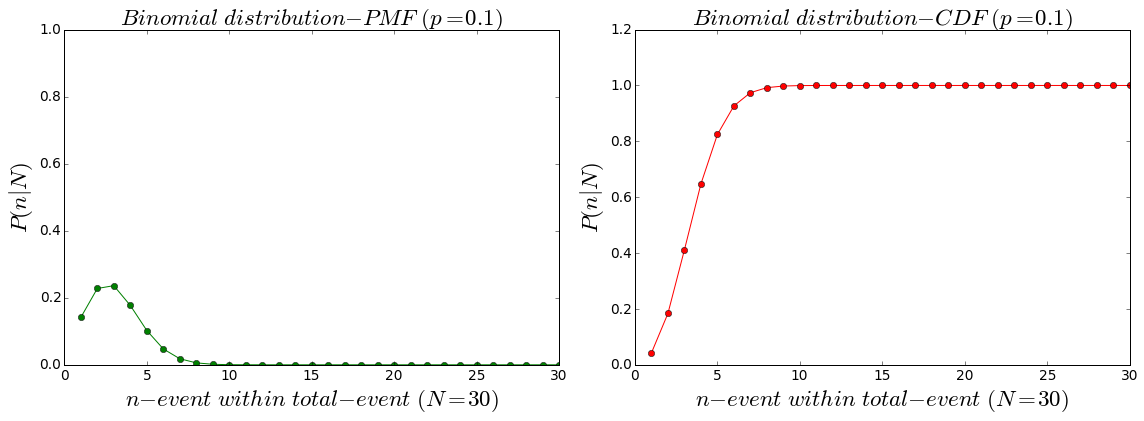

In [3]:
#testing
i = 100
print ('AlvaM =', alva.productA(i))
print ('NumPy =', np.arange(1, i + 1).prod(dtype = float))


def AlvaBinomialD(i, N, p):
    B_distribution = 0.0*i
    B_distribution[:] = alva.productA(N) / (alva.productA(i[:]) * alva.productA(N - i[:])) \
                        * p**i[:] * (1 - p)**(N - i[:])
    return (B_distribution)

def AlvaBinomialC(m, N, p, binomialD):
    B_C = 0.0*m
    for j in range(np.size(m)):
        for k in range(m[j]):
            i = np.arange(k + 1)
            B_distribution = binomialD(i, N, p)
        B_C[j] = B_C[j] + B_distribution.sum()
    return (B_C)

total_event = int(30)
i_event = np.arange(1, total_event + 1)
totalPoint_Input = total_event
probability_each = 0.1

binomial_D = AlvaBinomialD(i_event, total_event, probability_each)
print ('total-probability = {:f}'.format(binomial_D.sum()))
# plotting1
figure = plt.figure(numberingFig, figsize = AlvaFigSize)
plot1 = figure.add_subplot(1, 2, 1)
plot1.plot(i_event, binomial_D, marker ='o', color = 'green')
plt.title(r'$ Binomial \ distribution-PMF \ (p={:}) $'.format(probability_each), fontsize = AlvaFontSize)
plt.xlabel(r'$ n-event \ within \ total-event \ (N={:}) $'.format(total_event), fontsize = AlvaFontSize)
plt.ylabel(r'$ P(n|N) $', fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.6)
plt.yticks(fontsize = AlvaFontSize*0.6) 
plt.ylim(0, 1) 
# plotting2
i_event = np.arange(1, total_event + 1)
binomial_C = AlvaBinomialC(i_event, total_event, probability_each, AlvaBinomialD)
plot2 = figure.add_subplot(1, 2, 2)
plot2.plot(i_event, binomial_C, marker ='o', color = 'red')
plt.title(r'$ Binomial \ distribution-CDF \ (p={:}) $'.format(probability_each), fontsize = AlvaFontSize)
plt.xlabel(r'$ n-event \ within \ total-event \ (N={:}) $'.format(total_event), fontsize = AlvaFontSize)
plt.ylabel(r'$ P(n|N) $', fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.6)
plt.yticks(fontsize = AlvaFontSize*0.6)   
figure.tight_layout()
plt.show()

('probability_each_list =', array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9]))


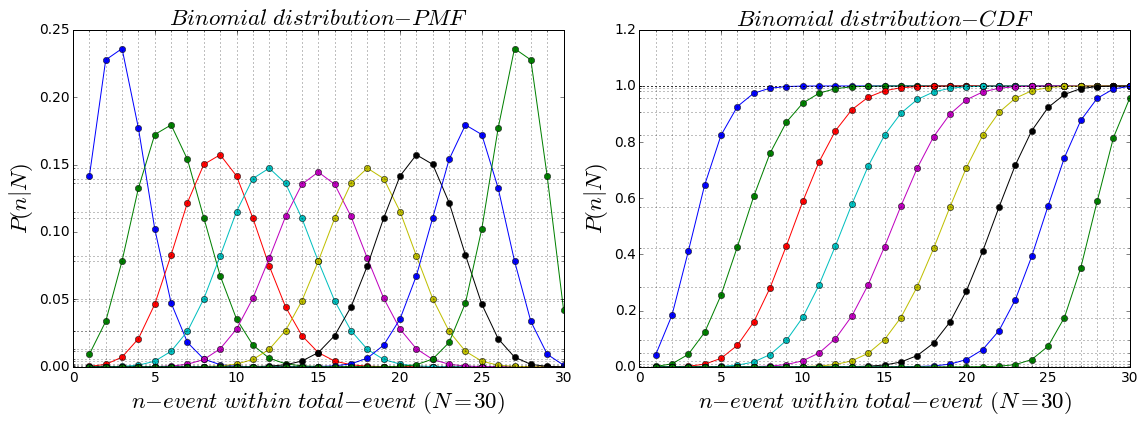

In [4]:
# plotting a list
number_list = 9
probability_each_list = np.arange(1, number_list + 1)*1.0/(number_list + 1)
print ('probability_each_list =', probability_each_list)

binomial_D_list = np.zeros([number_list, total_event])
for i in range(number_list):
    binomial_D_list[i] = AlvaBinomialD(i_event, total_event, probability_each_list[i])
#    print ('total-probability = {:f}'.format(binomial_D_list[i].sum()))
binomial_C_list = np.zeros([number_list, total_event])
for i in range(number_list):
    binomial_C_list[i] = AlvaBinomialC(i_event, total_event, probability_each_list[i], AlvaBinomialD)

# plotting
figure = plt.figure(numberingFig, figsize = AlvaFigSize)
plot1 = figure.add_subplot(1, 2, 1)
plot1.plot(i_event, binomial_D_list.T, marker ='o')
if totalPoint_Input < 100:
    plot1.set_xticks(i_event, minor = True) 
    plot1.set_yticks(binomial_D_list[(number_list + 1)/2], minor = True) 
    plot1.grid(True, which = 'minor')
else:
    plot1.grid(True, which = 'major')
plt.title(r'$ Binomial \ distribution-PMF $', fontsize = AlvaFontSize)
plt.xlabel(r'$ n-event \ within \ total-event \ (N={:}) $'.format(total_event), fontsize = AlvaFontSize)
plt.ylabel(r'$ P(n|N) $', fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.6)
plt.yticks(fontsize = AlvaFontSize*0.6) 

plot2 = figure.add_subplot(1, 2, 2)
plot2.plot(i_event, binomial_C_list.T, marker ='o')
if totalPoint_Input < 100:
    plot2.set_xticks(i_event, minor = True) 
    plot2.set_yticks(binomial_C_list[(number_list + 1)/2], minor = True) 
    plot2.grid(True, which = 'minor')
else:
    plot2.grid(True, which = 'major')
plt.title(r'$ Binomial \ distribution-CDF $', fontsize = AlvaFontSize)
plt.xlabel(r'$ n-event \ within \ total-event \ (N={:}) $'.format(total_event), fontsize = AlvaFontSize)
plt.ylabel(r'$ P(n|N) $', fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.6)
plt.yticks(fontsize = AlvaFontSize*0.6) 

figure.tight_layout()
plt.show()

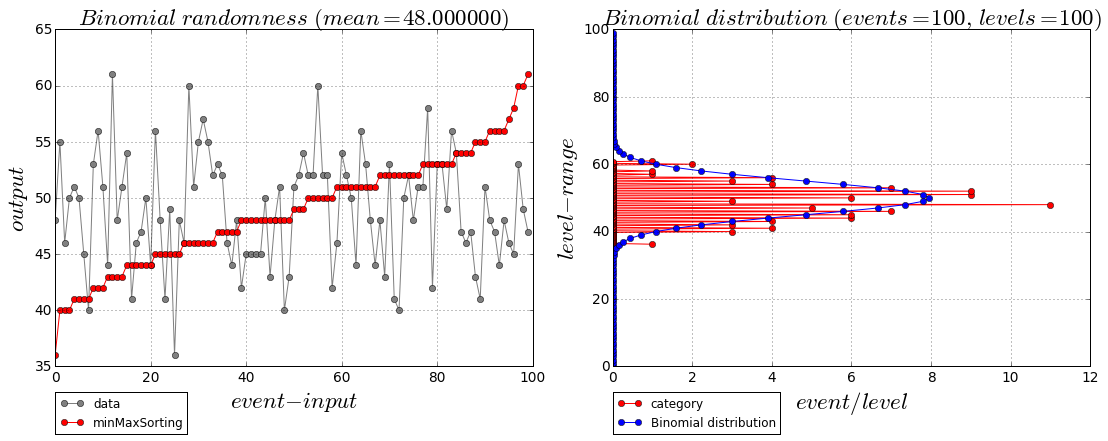

In [5]:
'''Binomial randomness --- Binomial distribution'''

total_event = int(100)
gInput = np.arange(total_event)
output_level = total_event
probability_peak = 0.5
randomSeed = np.random.binomial(output_level, probability_peak, total_event)

sumP = 0
for i in range(total_event):
    sumP = sumP + randomSeed[i]
meanP = sumP/(total_event)

totalLevel = int(total_event/1)
category = alva.AlvaLevel(randomSeed, totalLevel, False)
gLevel = category[0]
numberLevel = category[1]

binomial_D = total_event*AlvaBinomialD(np.arange(totalLevel), totalLevel, probability_peak)

# plotting
figure_name = ''
file_suffix = '.png'
save_figure = os.path.join(saving_dir_path, file_name + figure_name + file_suffix)

numberingFig = numberingFig + 1
figure = plt.figure(numberingFig, figsize = AlvaFigSize)
plot1 = figure.add_subplot(1, 2, 1)
plot1.plot(gInput, randomSeed, color = 'gray', marker = 'o', label = 'data')
plot1.plot(gInput, alva.AlvaMinMax(randomSeed), color = 'red', marker = 'o', label = 'minMaxSorting')
if total_event < 100:
    plot1.set_xticks(gInput, minor = True) 
    plot1.set_yticks(randomSeed, minor = True)
    plot1.grid(True, which = 'minor')
else:
    plot1.grid(True, which = 'major')
plt.title(r'$ Binomial \ randomness \ (mean = {:1.6f}) $'.format(meanP), fontsize = AlvaFontSize)
plt.xlabel(r'$ event-input $', fontsize = AlvaFontSize)
plt.ylabel(r'$ output $', fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.6)
plt.yticks(fontsize = AlvaFontSize*0.6) 
plt.legend(loc = (0, -0.2))

plot2 = figure.add_subplot(1, 2, 2)
plot2.plot(numberLevel, gLevel, color = 'red', marker = 'o', label = 'category') 
plot2.plot(binomial_D, np.arange(totalLevel), color = 'blue', marker = 'o', label = 'Binomial distribution') 
if total_event < 100:
    plot2.set_xticks(numberLevel, minor = True) 
    plot2.set_yticks(gLevel, minor = True)
    plot2.grid(True, which = 'minor')
else:
    plot2.grid(True, which = 'major')
plt.title(r'$ Binomial \ distribution \ (events = {ev:},\ levels = {le:}) $'.format(ev = total_event, le = totalLevel)
          , fontsize = AlvaFontSize)
plt.xlabel(r'$ event/level $', fontsize = AlvaFontSize)
plt.ylabel(r'$ level-range $', fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.6)
plt.yticks(fontsize = AlvaFontSize*0.6) 
plt.legend(loc = (0, -0.2))

figure.tight_layout()
plt.savefig(save_figure, dpi = 300)
plt.show()